In [43]:
import matplotlib.pyplot as plt
import numpy as np


In [48]:
# Calculate the cosine similarity
# X = batch_size, seq_len, heads, head_dim
# (1, 8, 1, 64)
def cosine_similarity(X1, X2):
    X1 = X1.reshape(X1.shape[1], -1)
    X2 = X2.reshape(X2.shape[1], -1)
    print(X1.shape)
    
    dot = np.dot(X1.T, X2)
    norm_X1 = np.linalg.norm(X1, axis=0, keepdims=True)
    norm_X2 = np.linalg.norm(X2, axis=0, keepdims=True)
    return dot / (norm_X1.T @ norm_X2)


# Plot similarity
def plot_similarity_matrix(similarity_matrix):
    plt.figure(figsize=(8, 6))
    plt.imshow(similarity_matrix, cmap='viridis', origin='lower')
    plt.colorbar(label='Similarity')
    plt.title('Cosine Similarity Matrix')
    plt.show()

def plot_spatial_similarity(m, w, h, similarity_matrix, line_length):
    plt.figure(figsize=(8, 6))

    map = np.zeros((h,w))
    center = m + w//2 + h//2*line_length
    for j in range(h):
        for i in range(w):
            realpos = m + j*line_length + i
            val = similarity_matrix[center,realpos]
            map[h-j-1,i] = val
            plt.text(i, h-j-1, f'{val:.2f}', ha='center', va='center', color="black")

    # Set the range from 0 to 1
    plt.imshow(map, cmap='viridis', origin='lower', vmax=1, vmin=0)
    # Set x ticks and y ticks
    plt.xticks(np.arange(0, w, 1), np.arange(0, w, 1)-w//2)
    plt.yticks(np.arange(0, h, 1), np.arange(h, 0, -1)-h//2-1)
    plt.colorbar(label='Similarity')
    plt.show()
    


(8, 64)


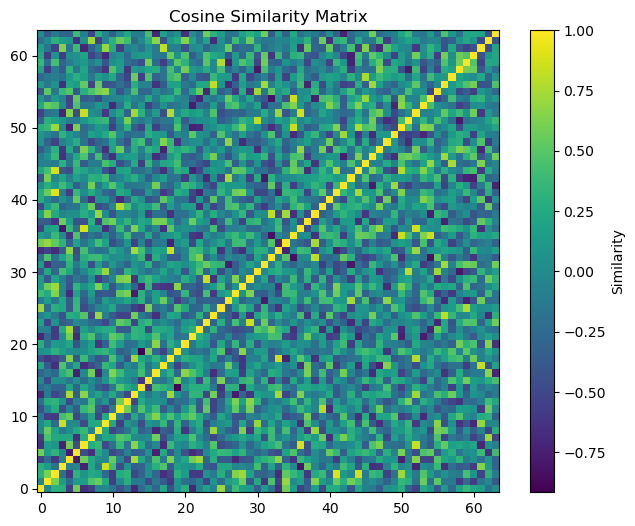

In [52]:
X_rope = np.load('./custom-llama/key_states_rope_applied.npy')
similarity_matrix_rope = cosine_similarity(X_rope, X_rope)
plot_similarity_matrix(similarity_matrix_rope)

(32, 64)


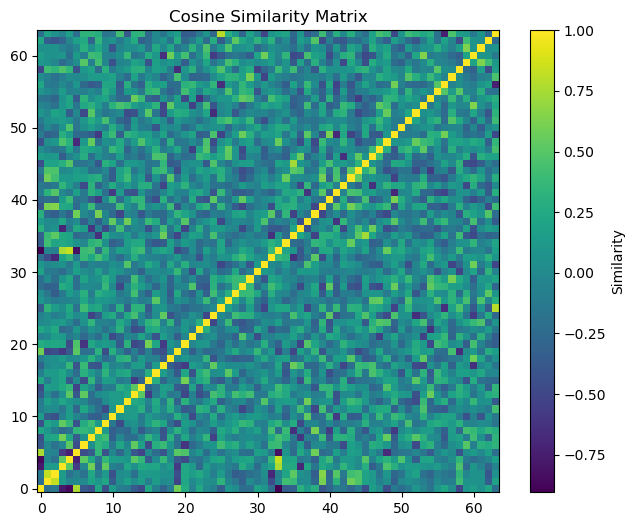

In [51]:
X_rope = np.load('./custom-llama/query_states_rope_applied.npy')
similarity_matrix_rope = cosine_similarity(X_rope, X_rope)
plot_similarity_matrix(similarity_matrix_rope)
